In [2]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
# https://data.marine.copernicus.eu/product/ARCTIC_ANALYSISFORECAST_PHY_ICE_002_011/description
ifile = '/data1/antonk/tmp/20230531_hr-nersc-MODEL-nextsimf-ARC-b20230524-fv00.0.nc'

space_step = 20
time_step = 1

with Dataset(ifile) as ds:
    x = ds['x'][::space_step]
    y = ds['y'][::space_step]
    siconc = ds['siconc'][::time_step, ::space_step, ::space_step]
    vxsi = ds['vxsi'][::time_step, ::space_step, ::space_step].filled(np.nan)
    vysi = ds['vysi'][::time_step, ::space_step, ::space_step].filled(np.nan)
    time = ds['time'][::time_step]
    time_bnds = ds['time_bnds'][::time_step]

print(x.shape, y.shape, siconc.shape, vxsi.shape, time.shape)

(124,) (119,) (24, 119, 124) (24, 119, 124) (24,)


In [138]:
time_bnds[0].mean(), time[0]

(45075.02083333333, 45075.02083333333)

In [111]:
vxsi[np.isnan(vxsi)] = 0
vysi[np.isnan(vysi)] = 0


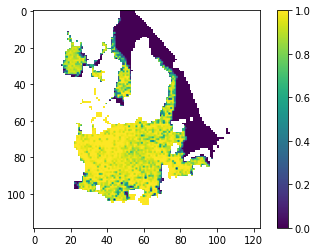

In [112]:
plt.imshow(siconc[0])
plt.colorbar()

In [132]:
min_conc = 0.15

delta_t = np.diff(time)*24*60*60

mask = np.where(siconc[0] > min_conc)

x_stp, y_stp = np.meshgrid(x, y)
x_stp = x_stp[mask]
y_stp = y_stp[mask]

xx = [x_stp]
yy = [y_stp]

In [133]:
for i in range(23):
    dxi = RegularGridInterpolator((y,x), vxsi[i])
    dyi = RegularGridInterpolator((y,x), vysi[i])
    u = dxi((y_stp, x_stp))*delta_t[i]
    v = dyi((y_stp, x_stp))*delta_t[i]
    x_stp = x_stp + u
    y_stp = y_stp + v
    xx.append(x_stp)
    yy.append(y_stp)


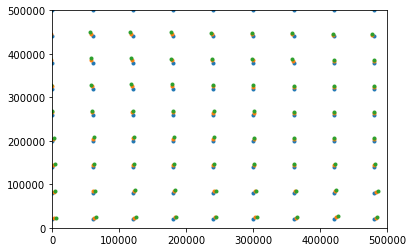

In [139]:
plt.plot(xx[0], yy[0], '.')
plt.plot(xx[12], yy[12], '.')
plt.plot(xx[-1], yy[-1], '.')
plt.xlim([0, 5e5])
plt.ylim([0, 5e5])
plt.show()